In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [2]:
pip install numpy pandas sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
#Read the data
df=pd.read_csv('news[1].csv')


df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:

labels=df.label
labels.head()

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL


In [5]:

x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [6]:

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)


tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [7]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.98%


In [8]:
# Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[588,  50],
       [ 39, 590]])

In [9]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.92      0.93       638
        REAL       0.92      0.94      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [10]:

cmt=confusion_matrix(y_test,y_pred)
print(cmt)

[[588  50]
 [ 39 590]]


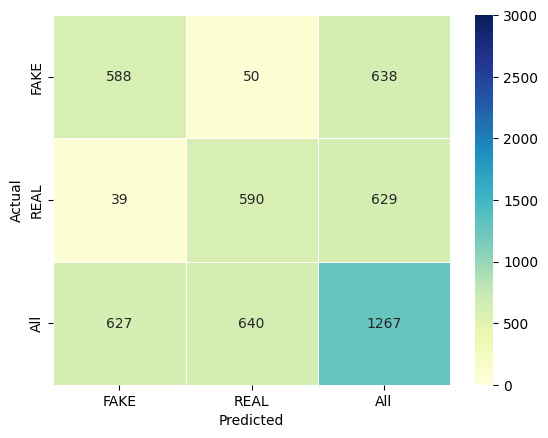

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
cmt1= pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)
#cmap=sns.mp1_palette("Set3",20)
#f,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cmt1,annot=True,fmt="d",cmap="YlGnBu",linewidth=.5,vmin=0,vmax=3000)
plt.show()

              precision    recall  f1-score   support

        FAKE       0.90      0.94      0.92       638
        REAL       0.94      0.89      0.91       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



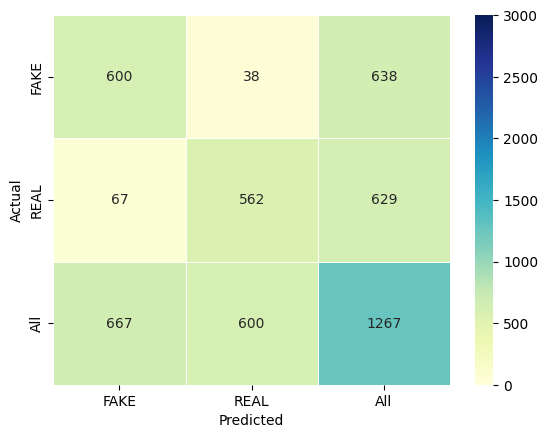

In [12]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(tfidf_train,y_train)
pred_lr = LR.predict(tfidf_test)
LR.score(tfidf_test,y_test)
print(classification_report(y_test,pred_lr))
cmt1= pd.crosstab(y_test,pred_lr,rownames=['Actual'],colnames=['Predicted'],margins=True)
#cmap=sns.mp1_palette("Set3",20)
#f,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cmt1,annot=True,fmt="d",cmap="YlGnBu",linewidth=.5,vmin=0,vmax=3000)
plt.show()

              precision    recall  f1-score   support

        FAKE       0.80      0.82      0.81       638
        REAL       0.82      0.79      0.80       629

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



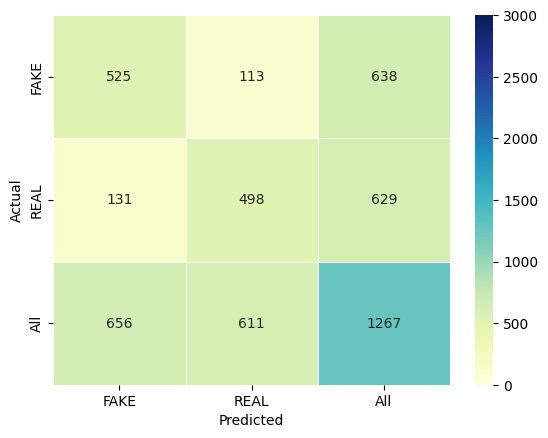

In [13]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(tfidf_train,y_train)
pred_dt = DT.predict(tfidf_test)
DT.score(tfidf_test,y_test)
print(classification_report(y_test,pred_dt))
cmt1= pd.crosstab(y_test,pred_dt,rownames=['Actual'],colnames=['Predicted'],margins=True)
sns.heatmap(cmt1,annot=True,fmt="d",cmap="YlGnBu",linewidth=.5,vmin=0,vmax=3000)
plt.show()

              precision    recall  f1-score   support

        FAKE       0.88      0.91      0.90       638
        REAL       0.90      0.88      0.89       629

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



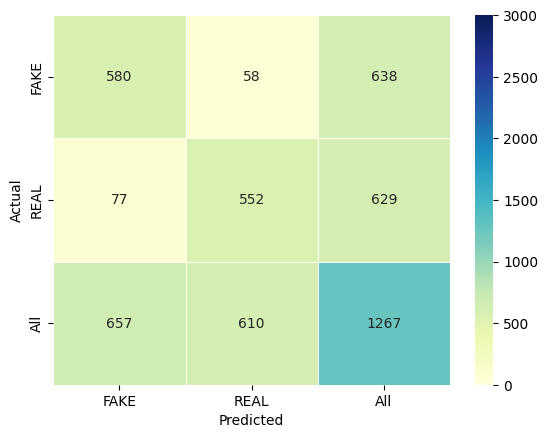

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(tfidf_train,y_train)
pred_GB = GB.predict(tfidf_test)
GB.score(tfidf_test,y_test)
print(classification_report(y_test,pred_GB))
cmt1= pd.crosstab(y_test,pred_GB,rownames=['Actual'],colnames=['Predicted'],margins=True)
sns.heatmap(cmt1,annot=True,fmt="d",cmap="YlGnBu",linewidth=.5,vmin=0,vmax=3000)
plt.show()

              precision    recall  f1-score   support

        FAKE       0.90      0.90      0.90       638
        REAL       0.90      0.90      0.90       629

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



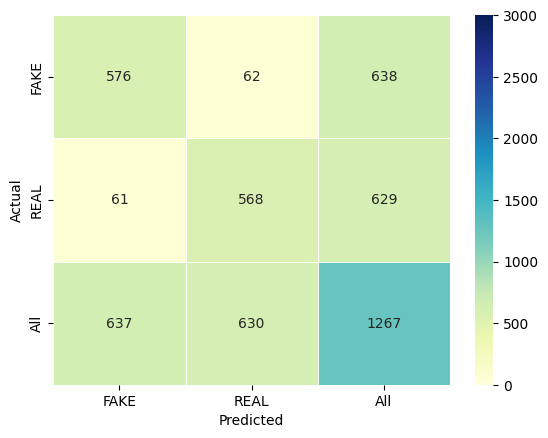

In [15]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(tfidf_train,y_train)
pred_RF = RF.predict(tfidf_test)
RF.score(tfidf_test,y_test)
print(classification_report(y_test,pred_RF))
cmt1= pd.crosstab(y_test,pred_RF,rownames=['Actual'],colnames=['Predicted'],margins=True)
sns.heatmap(cmt1,annot=True,fmt="d",cmap="YlGnBu",linewidth=.5,vmin=0,vmax=3000)
plt.show()